In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
tenders_df = pd.read_csv("/Users/songanisaikiran/Desktop/cleaned datasets/TENDERS_combined.csv", encoding="ISO-8859-1")
tock_df = pd.read_csv("/Users/songanisaikiran/Desktop/cleaned datasets/Tock.csv", encoding="ISO-8859-1")
items_df = pd.read_csv("/Users/songanisaikiran/Desktop/cleaned datasets/ITEMS_combined.csv", encoding='ISO-8859-1')

# Extract month-year from the transaction dates for both datasets
tenders_df['Month-Year'] = pd.to_datetime(tenders_df['Time']).dt.to_period('M')
tock_df['Month-Year'] = pd.to_datetime(tock_df['Transaction Date']).dt.to_period('M')

# Merge TENDERS_combined and ITEMS_combined based on Transaction ID
combined_df = pd.merge(tenders_df, items_df, on="Transaction ID", how="inner")

# Extract unique customers who've made a reservation from Tock.csv
reservations_email = tock_df['Email'].unique()



In [18]:
# Tag customers in the combined dataset based on whether they made a reservation or not
combined_df['made_reservation'] = combined_df['Customer Email'].isin(reservations_email)

# Group by 'Month-Year' and reservation status, then calculate the average spend for each group using 'Total Due_x'
monthly_avg_spend = combined_df.groupby(['Month-Year', 'made_reservation'])['Total Due_x'].mean().unstack().fillna(0)

# Rename the columns for clarity
monthly_avg_spend.columns = ['Average Spend Without Reservations', 'Average Spend With Reservations']

# Format the columns to include the $ symbol and round to two decimal places
monthly_avg_spend_comparison['Average Spend Without Reservations'] = monthly_avg_spend_comparison['Average Spend Without Reservations'].apply(lambda x: f"${round(x, 2):,.2f}")
monthly_avg_spend_comparison['Average Spend With Reservations'] = monthly_avg_spend_comparison['Average Spend With Reservations'].apply(lambda x: f"${round(x, 2):,.2f}")

print(monthly_avg_spend_comparison)


           Average Spend Without Reservations Average Spend With Reservations
Month-Year                                                                   
2022-09                               $160.41                          $98.50
2022-10                               $172.73                         $102.78
2022-11                               $210.21                         $119.30
2022-12                               $182.51                         $108.62
2023-01                               $236.85                         $119.92
2023-02                               $312.34                         $116.56
2023-03                               $257.80                         $162.93
2023-04                               $159.25                         $116.47
2023-05                               $155.51                          $93.75
2023-06                               $204.35                          $99.69
2023-07                               $153.21                   

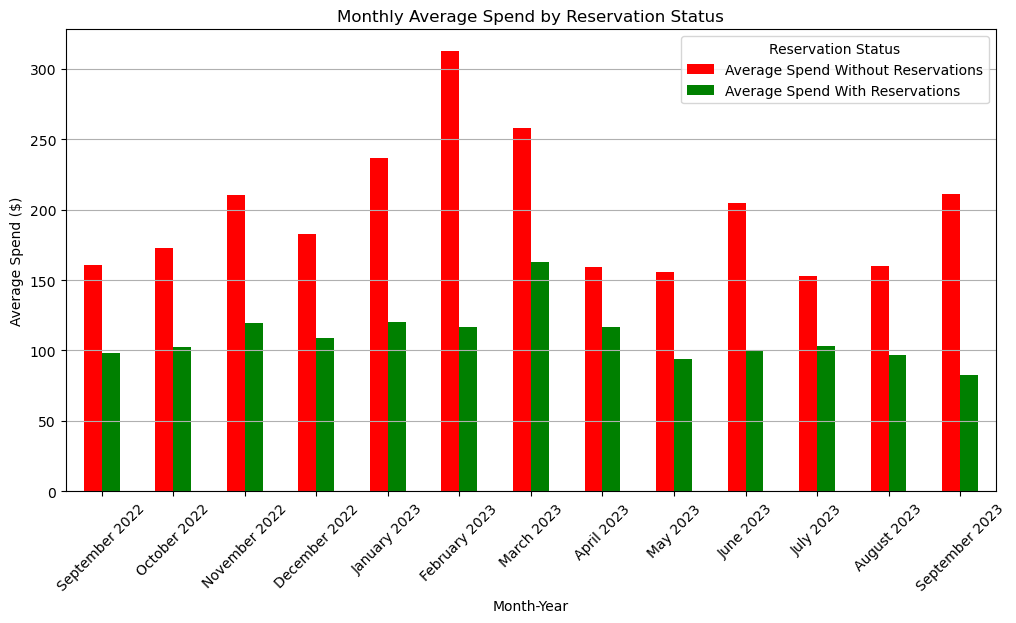

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Month-Year' to more readable format
monthly_avg_spend.index = monthly_avg_spend.index.strftime('%B %Y')

# Plotting the monthly average spend with red and green bar colors
plt.figure(figsize=(12, 6))
monthly_avg_spend.plot(kind='bar', color=['red', 'green'], ax=plt.gca())

plt.title('Monthly Average Spend by Reservation Status')
plt.xlabel('Month-Year')
plt.ylabel('Average Spend ($)')
plt.xticks(rotation=45)
plt.legend(title='Reservation Status')
plt.grid(axis='y')

# Show the plot
plt.show()
